사용할 데이터는 유방암 데이터셋입니다. 종양의 여러 가지 feature를 바탕으로 암인 지 아닌 지를 알아맞히는 거죠. 머신러닝 모델은 전부 만들어두었으니, 우리가 오늘 배운 각종 preprocessing 방법을 사용해 정확도만 올리면 됩니다. 전처리 하지 않았을 때의 정확도인 0.886을 넘겨보세요. train-test ssplit, DecisionTreeClassifier 전부 몰라도 돼요. 스케일링도 일단은 사용하지 않습니다.

In [2]:
import sklearn
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_breast_cancer

cancer=load_breast_cancer()

In [3]:
df = pd.DataFrame(cancer.data, columns=cancer.feature_names)

In [4]:
df.head(5)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [5]:
cancer.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [6]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size=0.2, random_state=3)
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
print('모델의 정확도 :', round(dtc.score(X_test, y_test), 4))

모델의 정확도 : 0.8947


In [7]:
df.isnull()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
565,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
566,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
567,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


<Axes: >

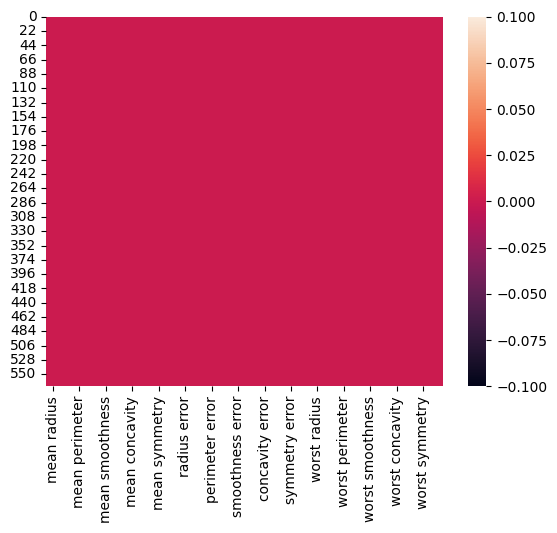

In [8]:
sns.heatmap(df.isnull())

In [9]:
df.columns

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension'],
      dtype='object')

In [10]:
df['mean radius'].skew()

np.float64(0.9423795716730992)

In [11]:
for col in df.columns:
    print(f'skewness of {col} is {df[col].skew()}')

skewness of mean radius is 0.9423795716730992
skewness of mean texture is 0.6504495420828159
skewness of mean perimeter is 0.9906504253930081
skewness of mean area is 1.6457321756240424
skewness of mean smoothness is 0.45632376481955844
skewness of mean compactness is 1.1901230311980404
skewness of mean concavity is 1.4011797389486722
skewness of mean concave points is 1.1711800812336282
skewness of mean symmetry is 0.7256089733641999
skewness of mean fractal dimension is 1.3044888125755076
skewness of radius error is 3.0886121663847574
skewness of texture error is 1.646443808753053
skewness of perimeter error is 3.443615202194899
skewness of area error is 5.447186284898394
skewness of smoothness error is 2.314450056636759
skewness of compactness error is 1.9022207096378565
skewness of concavity error is 5.110463049043661
skewness of concave points error is 1.4446781446974786
skewness of symmetry error is 2.1951328995478216
skewness of fractal dimension error is 3.923968620227413
skewn

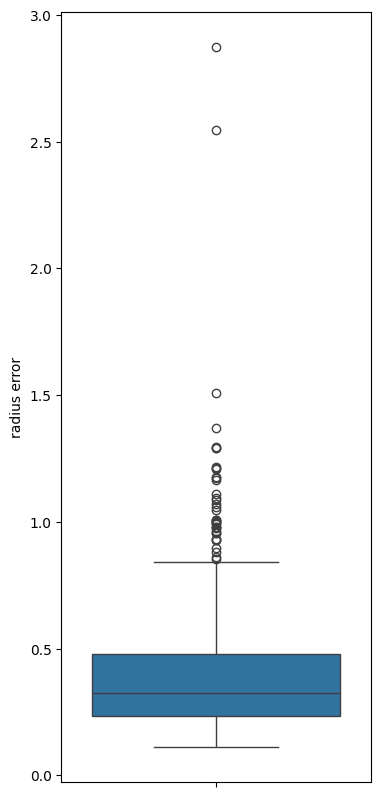

In [12]:
plt.figure(figsize = (4,10))
sns.boxplot(df['radius error'])
plt.show()

In [13]:
Q1 = df['radius error'].quantile(0.25)
Q3 = df['radius error'].quantile(0.75)
IQR = Q3 - Q1

In [14]:
whisker_width = 1.5
lower_whisker = Q1-whisker_width*IQR
upper_whisker = Q3+whisker_width*IQR

In [16]:
df = df[(df['radius error'] > lower_whisker) & (df['radius error'] < upper_whisker)]

In [17]:
df = df.reset_index()

In [18]:
df = df.iloc[:, 1:]

In [19]:
for col in df.columns:
    print(f'skewness of {col} is {df[col].skew()}')

skewness of mean radius is 0.8032471080854452
skewness of mean texture is 0.7391346486319155
skewness of mean perimeter is 0.8307949899727145
skewness of mean area is 1.3904157856309496
skewness of mean smoothness is 0.45508751110180595
skewness of mean compactness is 1.0535119386480936
skewness of mean concavity is 1.3686844683815729
skewness of mean concave points is 1.1016169060262953
skewness of mean symmetry is 0.5050371940998776
skewness of mean fractal dimension is 1.405092891773589
skewness of radius error is 1.05478598061457
skewness of texture error is 1.6535573856493762
skewness of perimeter error is 1.0750532479821484
skewness of area error is 1.679087217992637
skewness of smoothness error is 2.2758100862327746
skewness of compactness error is 1.9741035109032283
skewness of concavity error is 5.835917485265797
skewness of concave points error is 1.5950527610272018
skewness of symmetry error is 1.8854850014342706
skewness of fractal dimension error is 4.07276183177484
skewne

In [20]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size=0.2, random_state=3)
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
print('모델의 정확도 :', round(dtc.score(X_test, y_test), 4))

모델의 정확도 : 0.9123
